# Mounting on Google Drive

In [63]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [64]:
%cd /content/drive/MyDrive/Tutorials/Tutorial 5

/content/drive/MyDrive/Tutorials/Tutorial 5


In [65]:
!ls

 Glue_Data.csv	    'Glue Manufacturer.ipynb'
'Glue Failure.png'  'Tutorial 5.ipynb'


## Project discription

A manufacturer of advanced adhesive is studying the effect of 15 ingredients on the failure modes of adhered surfaces. When subjected to loading, debonding may occur at different locations in the adhesive joint. 
The Dataset listed the amount of these 15 ingredients (all scaled) for 
60 Samples with type 1 failure.
70 Samples with type 2 failure.
50 Samples with type 3 failure.

##### Part A
Do a PCA and find the first two Principal Components (PC1 and PC2). Plot PC1-PC2 for these 180 samples (identify the 3 types of failures).
Check how much information will preserve if we only use the first 4 principal components (in other words, if instead of using all 15 variables, we use the 4 new variables (the first 4 PCs).

##### Part B
Build an ANN classifier for these dataset. Once with these new 4 variables.

## Import libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import time

## Import the data

In [67]:
dataset = pd.read_csv('Glue_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [93]:
dataset.head()

,1.423,1.71,2.43,1.56,1.27,2.8,3.06,2.8.1,2.29,2.82,1.04,3.92,0.27,1.065,2.08,Type 1
0,1.320,1.78,2.14,1.12,1.00,2.65,2.76,2.6,1.28,2.190,1.05,3.40,0.25,1.050,2.10,Type 1
1,1.316,2.36,2.67,1.86,1.01,2.80,3.24,3.0,2.81,2.840,1.03,3.17,0.29,1.185,2.06,Type 1
2,1.437,1.95,2.50,1.68,1.13,3.85,3.49,2.4,2.18,3.900,0.86,3.45,0.23,1.480,1.72,Type 1
3,1.324,2.59,2.87,2.10,1.18,2.80,2.69,3.9,1.82,2.160,1.04,2.93,0.38,0.735,2.08,Type 1
4,1.420,1.76,2.45,1.52,1.12,3.27,3.39,3.4,1.97,3.375,1.05,2.85,0.33,1.450,2.10,Type 1


## Encoding the output data

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## PCA

In [70]:
from sklearn.decomposition import PCA
PrinCom=PCA(n_components=15) # we choose the number of PCs
PrinCom.fit(X)
Z=PrinCom.transform(X)

Visualizing the data after transformation

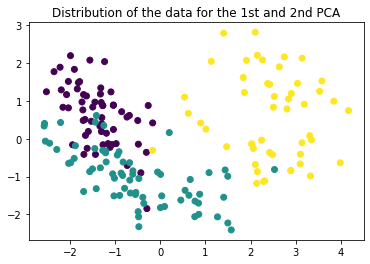

In [71]:
plt.scatter(Z[:,0],Z[:,1],c=y) 
plt.title("Distribution of the data for the 1st and 2nd PCA")
plt.show()

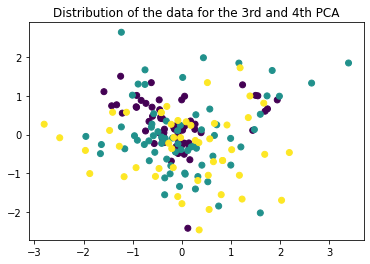

In [72]:
plt.scatter(Z[:,2],Z[:,3],c=y) 
plt.title("Distribution of the data for the 3rd and 4th PCA")
plt.show()

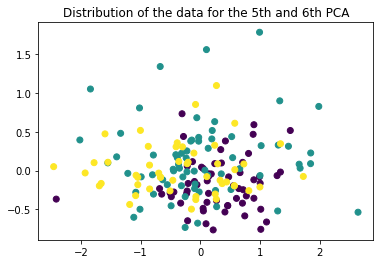

In [73]:
plt.scatter(Z[:,3],Z[:,4],c=y) 
plt.title("Distribution of the data for the 5th and 6th PCA")
plt.show()

## Checking the contribution of PCs

In [74]:
e = []
for z in Z.T:
  e.append(np.var(z))

In [75]:
contributions = []
for i in range(Z.shape[1]):
  contributions.append(np.sum(e[:i+1]) / np.sum(e))

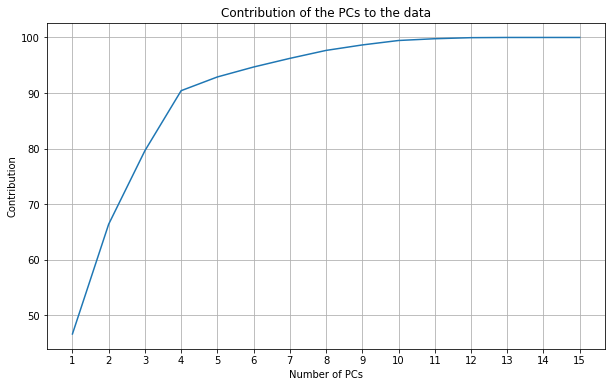

In [76]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1, 16)), [i*100 for i in contributions])
plt.title("Contribution of the PCs to the data")
plt.xlabel("Number of PCs")
plt.ylabel("Contribution")
plt.grid()
plt.xticks(list(range(1,16)))
plt.show()

# ANN model

The first 4 PCs are taken as input to the model

In [77]:
inputs= Z[:, 0:4]

Splitting the data to the trainingset and testset

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, y, test_size = 0.2, random_state = 0)

Feature scaling

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Building the model

In [80]:
GlueModel=tf.keras.models.Sequential()
GlueModel.add(tf.keras.layers.Dense(4,activation='relu'))
GlueModel.add(tf.keras.layers.Dense(2,activation='relu'))
GlueModel.add(tf.keras.layers.Dense(3,activation='softmax'))
GlueModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
GlueModel.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
18/18 [==============================] - 0s 3ms/step - loss: 1.2251 - accuracy: 0.2937
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1966 - accuracy: 0.2797
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1750 - accuracy: 0.2378
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1567 - accuracy: 0.2378
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1439 - accuracy: 0.2797
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1327 - accuracy: 0.3077
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1230 - accuracy: 0.3077
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1159 - accuracy: 0.3287
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1087 - accuracy: 0.3427
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1030 - accuracy: 0.3776
Epoch 11/

Evaluating the model over the test set

In [81]:
GlueModel.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.9531 - accuracy: 0.4167


[0.953141450881958, 0.4166666567325592]

### Trying the model with all the 15 PCs

In [82]:
inputs_2 = Z

In [83]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(inputs_2, y, test_size = 0.2, random_state = 0)

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

In [85]:
GlueModel_2=tf.keras.models.Sequential()
GlueModel_2.add(tf.keras.layers.Dense(4,activation='relu'))
GlueModel_2.add(tf.keras.layers.Dense(2,activation='relu'))
GlueModel_2.add(tf.keras.layers.Dense(3,activation='softmax'))
GlueModel_2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
GlueModel_2.fit(X_train_2, y_train_2, batch_size = 8, epochs = 100)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3562 - accuracy: 0.3007
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3013 - accuracy: 0.3147
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2588 - accuracy: 0.3497
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.2229 - accuracy: 0.3636
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1925 - accuracy: 0.3706
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1682 - accuracy: 0.3706
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1459 - accuracy: 0.3986
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1264 - accuracy: 0.4056
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 1.1075 - accuracy: 0.4406
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0890 - accuracy: 0.4755
Epoch 11/

In [86]:
GlueModel_2.evaluate(X_test_2,y_test_2)

2/2 [==============================] - 0s 7ms/step - loss: 0.1321 - accuracy: 1.0000


[0.13207387924194336, 1.0]

## Let's try some other classifiers like KNN, SVM, etc.

In [87]:
from sklearn.metrics import accuracy_score

#### KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # change n_neighbors; boundary becomes smoother with increasing value of K
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
# accuracy = np.sum(y_pred==y_test)/len(y_test)
# print(accuracy)

0.8888888888888888


In [90]:
from sklearn.svm import SVC
svmrbf = SVC(kernel='rbf')
svmrbf.fit(X_train, y_train)
y_pred = svmrbf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8611111111111112


In [91]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8055555555555556
